In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()

In [3]:
for key in iris.keys():
    print(key)

data
target
target_names
DESCR
feature_names


In [4]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
iris['data'].shape, type(iris['data'])

((150, 4), numpy.ndarray)

In [6]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris['target'].shape

(150,)

In [8]:
set(iris['target'])

{0, 1, 2}

In [9]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

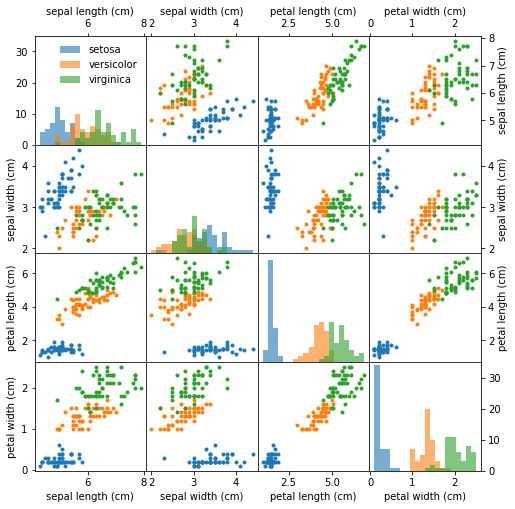

In [11]:
data       = iris['data']
target     = iris['target']
feature_names = iris['feature_names']
target_names  = iris['target_names']
n_features = data.shape[1]

fig, axes = plt.subplots(n_features, n_features)
fig.set_size_inches(8, 8)
plt.subplots_adjust(wspace=0, hspace=0)

for row in range(n_features):
    for col in range(n_features):
        vmin = data[:,row].min()
        vmax = data[:,row].max()
        axes[row][col].tick_params(left=False, right=False, top=False, bottom=False, labelbottom=False, labelleft=False)
        
        if row == col:
            for cls in set(target):
                ii = (target == cls)
                axes[row][col].hist(data[ii,row], range=(vmin, vmax), bins=20, alpha=.6, label=target_names[cls])
            axes[row][col].set_ylim(0,35)
        else:
            for cls in set(target):
                ii = target == cls
                axes[row][col].plot(data[ii,col], data[ii,row], '.')
                
        if col == 0:
            if row > 0:
                axes[row][col].set_ylabel(feature_names[row])
            axes[row][col].tick_params(left=True, labelleft=True)
        elif col == (n_features - 1):
            axes[row][col].tick_params(labelright=True, right=True)
            if row < (n_features - 1):
                axes[row][col].set_ylabel(feature_names[row])
                axes[row][col].yaxis.set_label_position("right")
            
        if row == 0:
            axes[row][col].tick_params(labeltop=True, top=True)
            axes[row][col].xaxis.set_label_position("top")
            axes[row][col].set_xlabel(feature_names[col])
        elif row == (n_features - 1):
            axes[row][col].tick_params(labelbottom=True, bottom=True)
            axes[row][col].set_xlabel(feature_names[col])
axes[0][0].legend(frameon=False)
fig.savefig("images/iris_plot_scattered.png")
plt.show()

## パーセプトロン

内花の幅と長さを用いて分類を行う

In [12]:
is_setosa = (target == 0)
model = Perceptron(max_iter=1000, tol=1e-3).fit(data[:,2:], is_setosa)

In [13]:
# パラメータを表示
print(f"coef: {model.coef_}, intercept: {model.intercept_}")

coef: [[-0.6 -1.2]], intercept: [2.]


In [14]:
# 分類をおこなってみる
predicted = model.predict(data[:,2:])
print(f"classification failed {np.count_nonzero(predicted != is_setosa)}/{is_setosa.size}")

classification failed 0/150


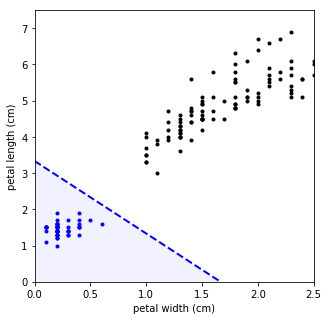

In [15]:
fig = plt.figure()
fig.set_size_inches(5, 5)

# x, yとしてwidth, lengthの値を作成
petal_width  = iris['data'][:,3]
petal_length = iris['data'][:,2]

# 境界線の図示に使うx, yを設定
line_x = np.linspace(0, 2/1.2, 2)
line_y = 2/0.6 - 2*line_x

# データ点のプロット
plt.plot(petal_width[is_setosa], petal_length[is_setosa], 'b.')
plt.plot(petal_width[~is_setosa], petal_length[~is_setosa], 'k.')
plt.plot(line_x, line_y, 'b--', lw=2)
plt.fill_between(line_x, line_y, color='b', lw=0, alpha=.05)
plt.xlim(0, 2.5)
plt.ylim(0, 7.5)
plt.xlabel(feature_names[3])
plt.ylabel(feature_names[2])
fig.savefig('images/perceptron_visualization.png')
plt.show()

## ロジスティックモデル

`sklearn.linear_model.LogisticRegression` の読み込み

In [16]:
from sklearn.linear_model import LogisticRegression

`petal_width` だけ用いて `setosa` の識別器を作ってみる

In [17]:
petal_width  = iris['data'][:,3]
input_data   = petal_width.reshape((-1,1))
is_setosa    = (iris['target'] == 0)

model = LogisticRegression(solver='lbfgs').fit(input_data, is_setosa)

print(f"coef: {model.coef_}, intercept: {model.intercept_}")

coef: [[-4.52898602]], intercept: [3.41492082]


$P_\mathrm{Setosa}(x) = \frac{1}{1 + \mathrm{e}^{4.53x + 3.42}}​$ のロジスティック曲線を表示する

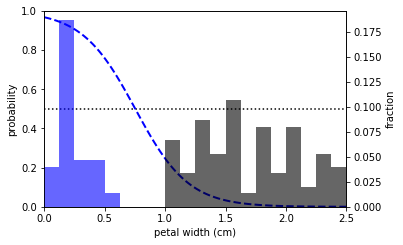

In [18]:
weights = np.ones(petal_width.size)/(petal_width.size)
line_x  = np.linspace(0, 2.5, 100)
line_exp= line_x * model.coef_[0,0] + model.intercept_[0]
line_y  = 1/(1 + np.exp(-line_exp))

fig, ax1 = plt.subplots()
ax1.plot(line_x, line_y, 'b--', lw=2)
ax1.hlines(0.5, 0, 2.5, color='k', linestyles='dotted')
ax1.set_ylim(0, 1)
ax1.set_xlim(0, 2.5)
ax1.set_ylabel("probability")
ax1.set_xlabel("petal width (cm)")
ax2 = ax1.twinx()
_ = plt.hist(petal_width[is_setosa], range=(0, 2.5), bins=20, color='b', edgecolor='none', alpha=.6, weights=weights[is_setosa])
_ = plt.hist(petal_width[~is_setosa], range=(0, 2.5), bins=20, color='k', edgecolor='none', alpha=.6, weights=weights[~is_setosa])
plt.ylabel("fraction")
plt.subplots_adjust(left=.15, right=.85, bottom=.2)
fig.savefig("images/logistic_plot.png")
plt.show()

### 多項ロジスティックモデルを動かす

In [19]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=300).fit(iris['data'], iris['target'])

print(f"coef: {model.coef_}, intercept: {model.intercept_}")

coef: [[-0.42339954  0.96170963 -2.5195144  -1.08594123]
 [ 0.53415033 -0.3179707  -0.20537656 -0.93966834]
 [-0.11075079 -0.64373893  2.72489096  2.02560957]], intercept: [  9.88126443   2.21931668 -12.1005811 ]


In [20]:
predicted = model.predict(iris['data'])

predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
np.count_nonzero(predicted != iris['target'])

4

予測が外れたサンプルについて、本来の分類と予測された分類のカテゴリ変数値を出力

In [22]:
nonmatch = (predicted != iris['target'])
predicted[nonmatch], iris['target'][nonmatch]

(array([2, 2, 2, 1]), array([1, 1, 1, 2]))